# 인급동 순위와 스팸 댓글과의 관계

### Logic

#인기 급상승 동영상 (출처: https://support.google.com/youtube/answer/7239739?hl=ko)

- 동일한 국가의 모든 시청자에게 동일한 목록으로 표시됨
- 15분마다 업데이트
- 다양한 시청자의 관심을 끌고, 선정적이지 않고, 흥미와 새로움을 느낄 만한 영상이어야 함
- 조회수, 조회수 증가 속도, 조회수가 발생하는 소스, 동영상 업로드 기간, 같은 채널의 다른 영상과 비교한 결과

#가설

- 인기 급상승 동영상일수록 스팸 댓글이 많이 달릴 것이다
- 최근 영상일수록 스팸 댓글이 잘 발견되며, 수일이 경과하면 삭제될 것이다

#수집 데이터 (수집 날짜는 하나로 고정)

- 인기 급상승 동영상 순위, 영상 제목
- 각 영상 별 업로드 날짜 (→ 수집 날짜와 비교하기)
- 영상 속 댓글 남긴 유저 닉네임

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
info = pd.read_excel("trending_info.xlsx")
comments = pd.read_excel("trending_comments.xlsx")

In [19]:
info.head()

,rank,video_id,title,published_at,channel_title,view_count,like_count
0,1,Ox29z5Nf1Uk,"[#2024MAMA] G-DRAGON - 무제(Untitled, 2014)+POWE...",2024-11-23T08:54:37Z,Mnet K-POP,7664616,441721.0
1,2,dgGqD28J6aQ,"[#2024MAMA] ROSÉ (로제), Bruno Mars - APT. | Mne...",2024-11-22T13:02:02Z,Mnet K-POP,8489651,447652.0
2,3,FrzrNV20KbQ,[아형✪하이라이트] ✨내 아내는 나 말고 다른 남자를 몰라✨ 신랑 민경훈이 신부에게...,2024-11-23T14:29:23Z,아는형님 Knowingbros,999241,14987.0
3,4,VtX6jD5BDPY,총합 117개 마인크래프트 모든 발전과제 달성하기,2024-11-23T03:36:20Z,코마,386452,11899.0
4,5,pZ1NdE69VTs,ROSÉ - number one girl (official music video),2024-11-22T05:00:06Z,ROSÉ,20561254,1416050.0


In [20]:
comments.head()

,video_id,author_name,comment
0,Ox29z5Nf1Uk,@미미미누,“The Living Legend”
1,Ox29z5Nf1Uk,@yariitorrez6163,"For me no kpop artist can match the energy, au..."
2,Ox29z5Nf1Uk,@prod.maddie,no new kpop fans will understand the feeling o...
3,Ox29z5Nf1Uk,@Jinnnnnn9586,"지금 기차안인데 내 대각선 자리, 대각선 앞자리까지 다 이 영상 보고있다 ㅠㅠㅠ"
4,Ox29z5Nf1Uk,@divinechild111,Did you all notice how the cheers went so loud...


가설 1. 인급동 순위가 높을 수록 스팸 댓글이 많이 달릴 것이다
 - 스팸 댓글 판단 기준: 유저 닉네임 (I9, 아이돌 등의 키워드 사용)
 - 가설을 확인하기 위한 기준이므로, 추후에 변경 필요

In [21]:
hypo1 = pd.merge(
    info[['rank', 'video_id']], comments[['video_id', 'author_name']],
    on='video_id', how='outer')
print(len(hypo1))

29036


In [22]:
hypo1.head()

,rank,video_id,author_name
0,1,Ox29z5Nf1Uk,@미미미누
1,1,Ox29z5Nf1Uk,@yariitorrez6163
2,1,Ox29z5Nf1Uk,@prod.maddie
3,1,Ox29z5Nf1Uk,@Jinnnnnn9586
4,1,Ox29z5Nf1Uk,@divinechild111


In [24]:
spam = ["I9", "아이돌"]

filtered_hypo1 = hypo1[hypo1['author_name'].str.contains('|'.join(spam), na=False)]

print(len(filtered_hypo1))

55


In [26]:
filtered_hypo1.head()

,rank,video_id,author_name
294,2,dgGqD28J6aQ,@눌러-아이돌A양사건101
314,3,FrzrNV20KbQ,@ON팬-VIP골드-I9금채널2
901,7,758qMZHRFxk,@아이돌A양보기-k3y
908,7,758qMZHRFxk,@아이돌A양보기-b3h
913,7,758qMZHRFxk,@I9금-보관용-계정-B97


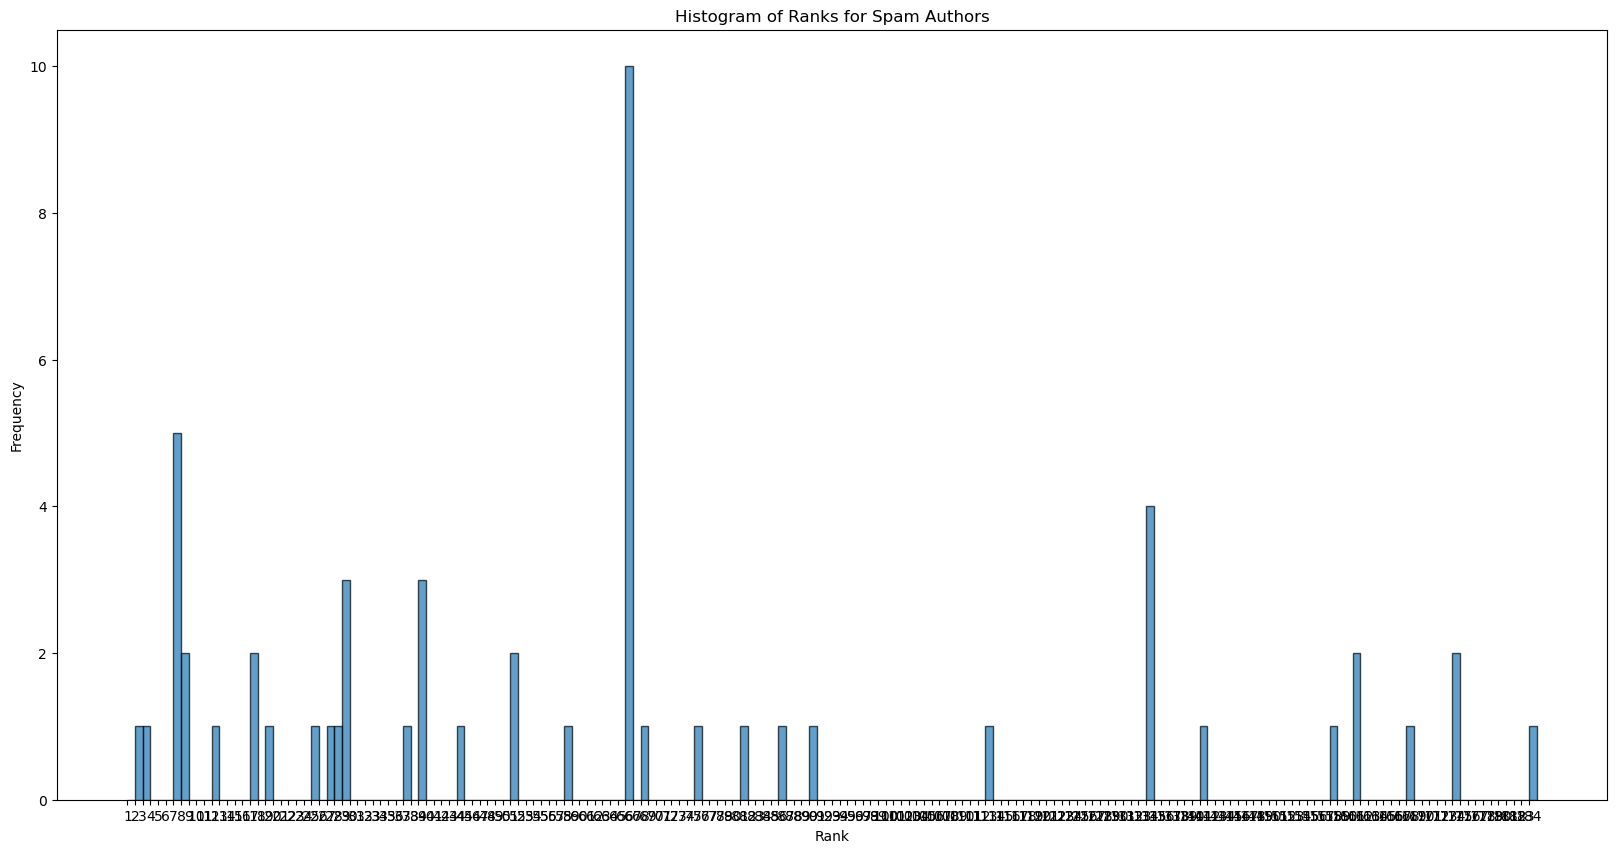

In [32]:
plt.figure(figsize=(20, 10))
plt.hist(filtered_hypo1['rank'], bins=range(1, filtered_hypo1['rank'].max() + 2), edgecolor='black', alpha=0.7)
plt.title('Histogram of Ranks for Spam Authors')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.xticks(range(1, filtered_hypo1['rank'].max() + 1))
plt.show()

In [33]:
spam_per_rank = filtered_hypo1.groupby('rank').size().reset_index(name='spam_count')
correlation = spam_per_rank['rank'].corr(spam_per_rank['spam_count'])

# 상관관계 출력
print(f"Correlation between rank and spam count: {correlation}")

Correlation between rank and spam count: -0.059206064661581265


유의미한 상관관계 없음 

In [35]:
from scipy.stats import pearsonr

p_value = pearsonr(spam_per_rank['rank'], spam_per_rank['spam_count'])
print(f"P-value: {p_value}")

P-value: PearsonRResult(statistic=-0.05920606466158123, pvalue=0.755969157241787)


가설 2. 최근 영상일수록 스팸 댓글이 많을 것이다. 

In [38]:
from datetime import datetime

hypo2 = pd.merge(info[['rank', 'video_id', 'published_at']], comments[['video_id', 'author_name']], on='video_id', how='outer')

crawl_time = datetime.strptime('2024-11-24 17:40:00', '%Y-%m-%d %H:%M:%S')

hypo2['published_at'] = pd.to_datetime(hypo2['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

hypo2['time_since_published'] = (crawl_time - hypo2['published_at']).dt.total_seconds() / 3600  # 시간 단위로 변환

In [39]:
hypo2.head()

,rank,video_id,published_at,author_name,time_since_published
0,1,Ox29z5Nf1Uk,2024-11-23 08:54:37,@미미미누,32.756389
1,1,Ox29z5Nf1Uk,2024-11-23 08:54:37,@yariitorrez6163,32.756389
2,1,Ox29z5Nf1Uk,2024-11-23 08:54:37,@prod.maddie,32.756389
3,1,Ox29z5Nf1Uk,2024-11-23 08:54:37,@Jinnnnnn9586,32.756389
4,1,Ox29z5Nf1Uk,2024-11-23 08:54:37,@divinechild111,32.756389


In [40]:
filtered_hypo2 = hypo2[hypo2['author_name'].str.contains('|'.join(spam), na=False)]

print(len(filtered_hypo2))

55


In [41]:
filtered_hypo2.head()

,rank,video_id,published_at,author_name,time_since_published
294,2,dgGqD28J6aQ,2024-11-22 13:02:02,@눌러-아이돌A양사건101,52.632778
314,3,FrzrNV20KbQ,2024-11-23 14:29:23,@ON팬-VIP골드-I9금채널2,27.176944
901,7,758qMZHRFxk,2024-11-23 20:57:29,@아이돌A양보기-k3y,20.708611
908,7,758qMZHRFxk,2024-11-23 20:57:29,@아이돌A양보기-b3h,20.708611
913,7,758qMZHRFxk,2024-11-23 20:57:29,@I9금-보관용-계정-B97,20.708611


In [44]:
import seaborn as sns
import scipy.stats as stats

grouped = filtered_hypo2.groupby('time_since_published').size().reset_index(name='count')

correlation, p_value = stats.pearsonr(grouped['time_since_published'], grouped['count'])

print(f"Pearson Correlation: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.07674152918834265
P-value: 0.686900062588453


무의미...

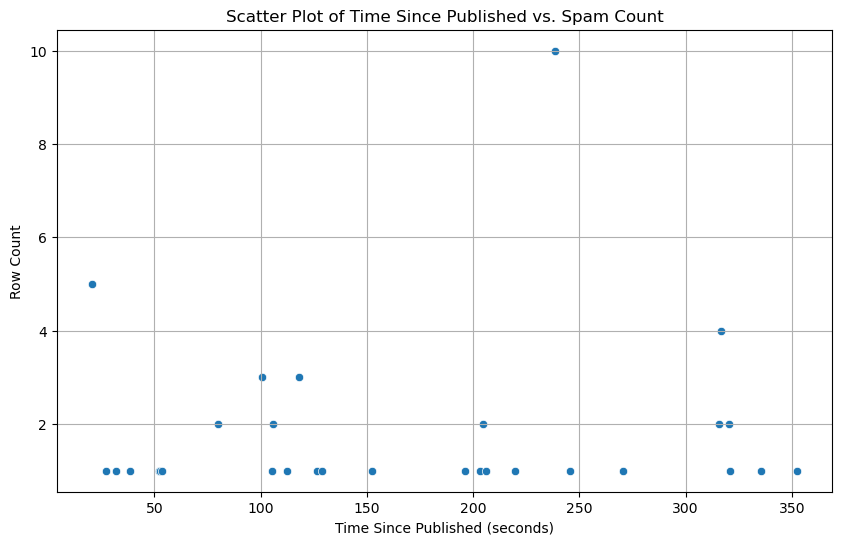

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=grouped['time_since_published'], y=grouped['count'])
plt.title('Scatter Plot of Time Since Published vs. Spam Count')
plt.xlabel('Time Since Published (seconds)')
plt.ylabel('Row Count')
plt.grid(True)
plt.show()